In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense

C:\Users\ASUS\anaconda3\envs\tensorgpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
import tensorflow
adam = tensorflow.optimizers.Adam(learning_rate=0.001 ,  beta_1=0.9 , beta_2=0.999 , epsilon=None , decay = 0.0 , amsgrad =False )

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255 , rotation_range=40 , shear_range=0.1 ,zoom_range=0.1 , horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory('train' , target_size=(64,64)  , batch_size=32 , class_mode='binary' )

test_set = test_datagen.flow_from_directory('test' , target_size=(64,64) , class_mode='binary' , shuffle=False)

Found 19978 images belonging to 2 classes.
Found 5006 images belonging to 2 classes.


In [5]:
train_set.labels[0:5]

array([0, 0, 0, 0, 0])

In [6]:
train_set.image_shape

(64, 64, 3)

In [7]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , input_shape = (64,64,3) , activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2) , strides=2))

model.add(Conv2D(32 ,(3,3) , activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2) , strides=2))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=1 , activation='sigmoid'))

model.compile(optimizer=adam , loss='binary_crossentropy' , metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [52]:
history=model.fit(train_set , epochs=4 , validation_data=test_set)

Epoch 1/4
266/625 [===========>..................] - ETA: 27s - loss: 0.4760 - accuracy: 0.7706 

C:\Users\ASUS\anaconda3\envs\tensorgpu\lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 52s 82ms/step - loss: 0.4734 - accuracy: 0.7740 - val_loss: 0.4548 - val_accuracy: 0.7787
Epoch 2/4
625/625 [==============================] - 32s 51ms/step - loss: 0.4583 - accuracy: 0.7843 - val_loss: 0.4382 - val_accuracy: 0.7903
Epoch 3/4
625/625 [==============================] - 32s 51ms/step - loss: 0.4498 - accuracy: 0.7898 - val_loss: 0.4392 - val_accuracy: 0.7964
Epoch 4/4
625/625 [==============================] - 32s 51ms/step - loss: 0.4414 - accuracy: 0.7935 - val_loss: 0.4162 - val_accuracy: 0.8040


In [53]:
from tensorflow.keras.preprocessing import image

In [54]:
img_path = r"C:\Users\ASUS\Desktop\archive2\test\cats\10009.jpg"

In [55]:
img = image.load_img(img_path , target_size=(64,64))

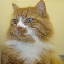

In [56]:
img

In [57]:
import numpy as np

img = np.array(img)

In [58]:
img.shape

(64, 64, 3)

In [59]:
img = img/255.0

In [60]:
img = np.expand_dims(img ,0)

In [61]:
img.shape

(1, 64, 64, 3)

In [62]:
prediction = model.predict(img)

1/1 [==============================] - 0s 15ms/step


In [63]:
prediction

array([[0.07860897]], dtype=float32)

In [64]:
if prediction>0.5:
    print('doggggg')

else:
    print('catttt')

catttt


In [65]:
score = model.evaluate(test_set , verbose=0)

In [66]:
score

[0.4161991477012634, 0.8040351867675781]

In [67]:
print('loss' , score[0])
print('accuracy' , score[1])

loss 0.4161991477012634
accuracy 0.8040351867675781


In [70]:
history_dict = history.history

In [71]:
history_dict

{'loss': [0.4734181761741638,
  0.45832422375679016,
  0.4497693181037903,
  0.4413544833660126],
 'accuracy': [0.77400141954422,
  0.7842627167701721,
  0.7897687554359436,
  0.7935228943824768],
 'val_loss': [0.4548186659812927,
  0.4382430613040924,
  0.43923336267471313,
  0.4161991477012634],
 'val_accuracy': [0.7786656022071838,
  0.7902516722679138,
  0.7964442372322083,
  0.8040351867675781]}

In [72]:
import matplotlib.pyplot as plt

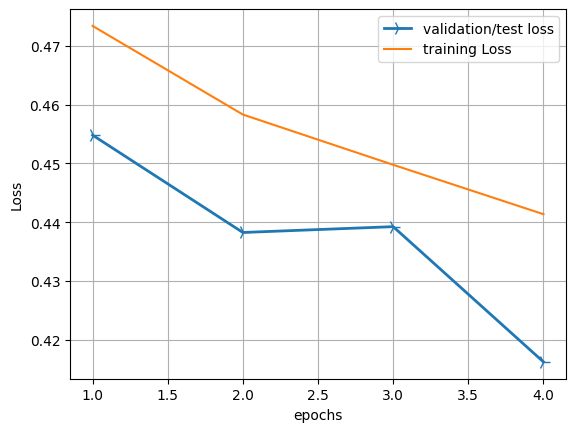

In [73]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1 , len(loss_values)+1)



line1 = plt.plot(epochs , val_loss_values , label = 'validation/test loss')

line2 = plt.plot(epochs , loss_values  , label = 'training Loss')

plt.setp(line1 , linewidth = 2.0 , marker='+' , markersize = 10.0)
plt.setp(line1 , linewidth = 2.0 , marker='4' , markersize = 10.0)

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


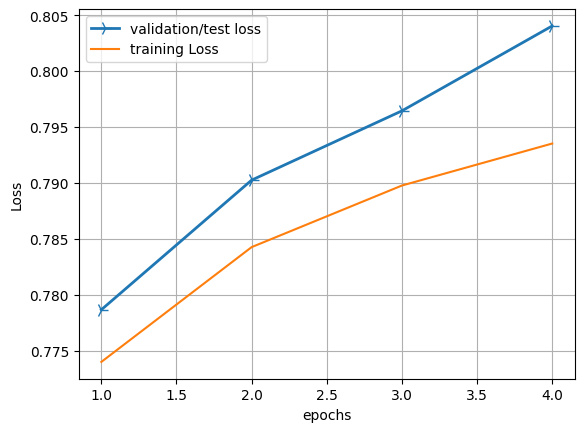

In [74]:
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1 , len(loss_values)+1)



line1 = plt.plot(epochs , val_loss_values , label = 'validation/test loss')

line2 = plt.plot(epochs , loss_values  , label = 'training Loss')

plt.setp(line1 , linewidth = 2.0 , marker='+' , markersize = 10.0)
plt.setp(line1 , linewidth = 2.0 , marker='4' , markersize = 10.0)

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [75]:
import cv2

In [76]:
def draw_test(name , pred , input_im):
    BLACK=[0,0,0]


    expanded_img = cv2.copyMakeBorder(input_im , 0,0,0,28 , cv2.BORDER_REFLECT , value=BLACK)
    expanded_img = cv2.cvtColor(expanded_img , cv2.COLOR_GRAY2BGR)


    cv2.putText(expanded_img , str(pred) , (150,80) , cv2.FONT_HERSHEY_SCRIPT_COMPLEX , 4 ,(0,255,0) , 2)
    imshow(name ,expanded_img)

In [91]:
for i in range(0,10):

    rand = np.random.randint(0,len(test_set))
    x_batch , y_batch = test_set[rand]

    rand_img = np.random.randint(0 , x_batch.shape[0])
    input_im = x_batch[rand_img]


    imageL = cv2.resize(input_im,None , fx=4 , fy=4  , interpolation= cv2.INTER_CUBIC)

    input_im = input_im.reshape(1,64,64,3)

    res = model.predict(input_im)
    if res>0.5:
        print('doggggg')

    else:
        print('catttt')
    

    draw_test('pres' , res , np.uint8(imageL))
    

1/1 [==============================] - 0s 21ms/step
catttt


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x6f7fe6c3::Set<3,4,-1>,struct cv::impl::A0x6f7fe6c3::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


In [85]:
x_batch , y_batch = test_set[0]

print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 3)
(32,)


In [88]:
x_batch.shape[0]

32